In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import zipfile

In [4]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/jj/emosi (1).zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

Importing libraries

In [5]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Importing libraries**

In [6]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

nltk.download("stopwords")

In [7]:
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()


Modelling

In [8]:
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

Read datasets

In [9]:
df = pd.read_csv('/content/dataset/Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset/PRDECT-ID Dataset.csv')

In [10]:
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


print the shape of the data set

In [11]:
print(df.shape)

(5400, 11)


# **Assessing**

Train dataset

check if the data is balanced or not

In [12]:
df.Emotion.value_counts()

Happy      1770
Sadness    1202
Fear        920
Love        809
Anger       699
Name: Emotion, dtype: int64

check if the data is balanced or not

In [13]:
df.Emotion.value_counts() / df.shape[0] *100

Happy      32.777778
Sadness    22.259259
Fear       17.037037
Love       14.981481
Anger      12.944444
Name: Emotion, dtype: float64

Visualize the distribution of emotions

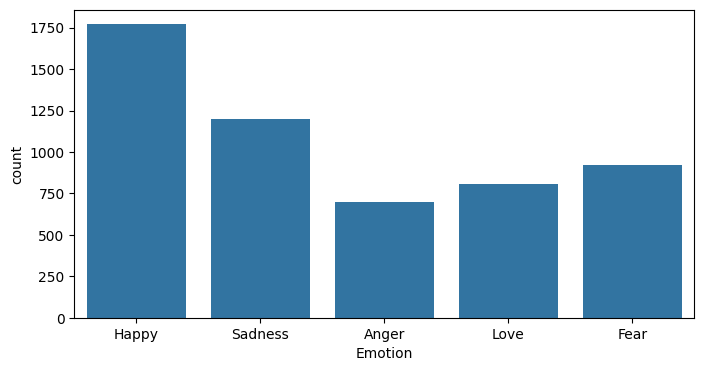

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df);

print the number of null values in each column

In [15]:
df.isnull().sum()

Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

print the number of duplicated values

In [16]:
df.duplicated().sum()

7

removing duplicated values

In [17]:
index = df[df.duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

print the rows which are duplicated (duplicated in the Customer Review	 but with different emotions)

In [18]:
df[df['Customer Review'].duplicated() == True]

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
76,Computers and Laptops,Logitech M191 Mouse Wireless Full Size - Mid Grey,Jakarta Timur,299000,4.9,9798,5559,1,Sangat kecewa. Baru 4 bulan scroll sudah rusak.,Negative,Sadness
187,Computers and Laptops,RB - C78 Meja Laptop Lipat Portable Meja Belaj...,Kab. Tangerang,39998,4.7,5936,2344,1,biarkan gambar bercerita.. pesan 20 bh yg rusa...,Negative,Fear
188,Computers and Laptops,RB - C78 Meja Laptop Lipat Portable Meja Belaj...,Kab. Tangerang,39998,4.7,5936,2344,1,"Seharusnya chat dijadikan makesure barang, war...",Negative,Fear
278,Toys and Hobbies,Paket UNO STACKO + KARTU UNO + 2 DADU - paket ...,Jakarta Pusat,50000,4.9,6036,3462,1,barangnya datang dalam keadaan tidak bagus,Negative,Anger
279,Toys and Hobbies,Jumping Pirates Roulette Family Game,Kota Tangerang,35000,4.8,5415,2330,1,Barang rusak ga berfungsi sama sekali� ga bisa...,Negative,Anger
...,...,...,...,...,...,...,...,...,...,...,...
4025,Kitchen,Bagus Anti Bau Gel Lemari Es 180 gr,Jakarta Utara,37300,4.9,5216,1413,1,Pengiriman sangat lama,Negative,Sadness
4137,Electronics,Xiaomi Xiaovv Webcam 1080P USB Camera Full HD ...,Jakarta Barat,188000,4.9,3231,1518,1,"Packing seadanya, bubble hanya selapis saja di...",Negative,Sadness
4903,Mother and Baby,Merries Pants Positive Skin L 39,Kota Bekasi,50800,5.0,5700,1696,3,packingnya kurang memuaskan,Negative,Anger
5166,Beauty,MAKE OVER Hydrastay Radiant Finishing Powder 8...,Kab. Serang,120000,4.9,3055,1694,5,Pengiriman cepat. Pesanan sesuai. Gak ada caca...,Positive,Happy


print some of those rows to check

In [19]:
print(df[df['Customer Review'] == df.iloc[0]['Customer Review']])


                Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   

        Location  Price  Overall Rating  Number Sold  Total Review  \
0  Jakarta Utara  53500             4.9         5449          2369   

   Customer Rating                                    Customer Review  \
0                5  Alhamdulillah berfungsi dengan baik. Packaging...   

  Sentiment Emotion  
0  Positive   Happy  


removing duplicated Customer Review

In [20]:
index = df[df['Customer Review'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

Count the number of stopwords in the data

In [21]:
temp =df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Customer Review'].apply(lambda x: len(set(x.split()) & set(stop_words)))

In [22]:
print(temp['stop_words'])

0       0
1       0
2       0
3       0
4       0
       ..
5388    0
5389    0
5390    0
5391    0
5392    0
Name: stop_words, Length: 5305, dtype: int64


Visualization of the distribution of words that are stopwords

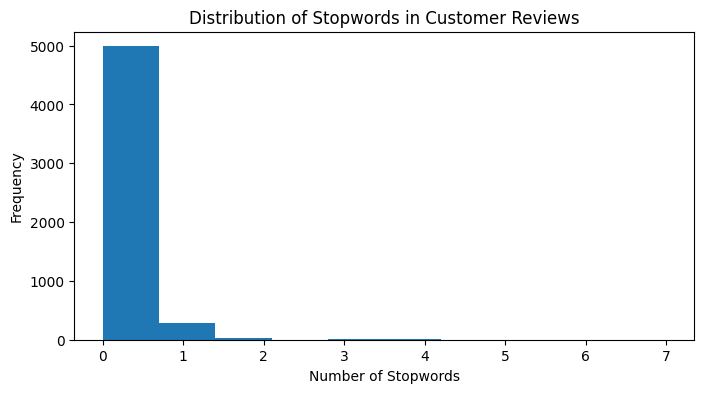

In [23]:
plt.figure(figsize=(8, 4))
temp['stop_words'].plot(kind='hist')
plt.title('Distribution of Stopwords in Customer Reviews')
plt.xlabel('Number of Stopwords')
plt.ylabel('Frequency')
plt.show()

**Cleaning**

In [24]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):

    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [25]:
def normalize_text(df):
    df['Customer Review'] = df['Customer Review'].apply(lambda text: lower_case(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: remove_stop_words(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: Removing_numbers(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: Removing_punctuations(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: Removing_urls(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: lemmatization(text))
    return df


Before cleaning

In [26]:
print("Sebelum Pembersihan:")
print(df['Customer Review'].iloc[0])

Sebelum Pembersihan:
Alhamdulillah berfungsi dengan baik. Packaging aman. Respon cepat dan ramah. Seller dan kurir amanah


After cleaning

In [27]:
  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
print("Setelah Pembersihan:")
df_cleaned = normalize_text(df)
print(df_cleaned['Customer Review'].iloc[0])

Setelah Pembersihan:
alhamdulillah berfungsi dengan baik packaging aman respon cepat dan ramah seller dan kurir amanah


**Modeling**

# **TF-IDF**


Creating a pipline using tf-idf for words embedding and different models.

Preprocess Customer Review

In [29]:
X_train = df['Customer Review'].values
y_train = df['Emotion'].values

  Create a Pipeline object with a TfidfVectorizer and the given model

In [30]:
def train_model(model, data, targets):
      text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
      text_clf.fit(data, targets)
      return text_clf

  Make predictions on the input data using the trained model

In [31]:
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

Training the Logistic Regression model on the Training set

Train the model with the training data

In [32]:
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

Make a single prediction

In [33]:
y_pred=log_reg.predict(['Happy'])
y_pred

array(['Love'], dtype=object)

test the model with the data

In [34]:
y_pred=log_reg.predict(X_train)

calculate the accuracy

In [35]:
log_reg_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

Accuracy:  0.8196041470311027 



calculate the F1 score

In [36]:
f1_Score = get_F1(log_reg,X_train,y_train)
pd.DataFrame(f1_Score, index=df.Emotion.unique(), columns=['F1 score'])

,F1 score
Happy,0.765055
Sadness,0.781449
Anger,0.874573
Love,0.726346
Fear,0.839067


Classification Report

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       Anger       0.89      0.67      0.77       675
        Fear       0.81      0.76      0.78       892
       Happy       0.81      0.95      0.87      1753
        Love       0.87      0.62      0.73       800
     Sadness       0.79      0.90      0.84      1185

    accuracy                           0.82      5305
   macro avg       0.83      0.78      0.80      5305
weighted avg       0.83      0.82      0.81      5305



# **SVM**

Train the model with the training data

In [44]:
SVM = train_model(SVC(random_state = 0), X_train, y_train)

test the model with the test data

In [45]:
y_pred=SVM.predict(X_train)

calculate the accuracy

In [46]:
SVM_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

Accuracy:  0.9719132893496701 



calculate the F1 score

In [47]:
f1_Score = get_F1(SVM,X_train,y_train)
pd.DataFrame(f1_Score, index=df.Emotion.unique(), columns=['F1 score'])

,F1 score
Happy,0.962179
Sadness,0.975253
Anger,0.979960
Love,0.957134
Fear,0.972546


In [48]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       Anger       0.98      0.94      0.96       675
        Fear       0.98      0.97      0.98       892
       Happy       0.97      0.99      0.98      1753
        Love       0.98      0.94      0.96       800
     Sadness       0.96      0.99      0.97      1185

    accuracy                           0.97      5305
   macro avg       0.97      0.97      0.97      5305
weighted avg       0.97      0.97      0.97      5305



# **Text Preprocessing**

Splitting the Customer Review from the labels

In [49]:
X_train = df['Customer Review']
y_train = df['Emotion']

X_test = df['Customer Review']
y_test = df['Emotion']

X_val = df['Customer Review']
y_val = df['Emotion']

Encode labels

In [50]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

print the labels after encoding

In [51]:
print(set(y_train))

{0, 1, 2, 3, 4}


Convert the class vector (integers) to binary class matrix

In [52]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [53]:
print(y_train)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


# **Tokenizing**

Tokenize words

In [54]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))
tokenizer.document_count

10610

Add 'towards' to the tokenizer's word_index with a new index

In [55]:
tokenizer.word_index['towards'] = len(tokenizer.word_index) + 1

converting a single sentence to list of indexes

In [56]:
tokenizer.texts_to_sequences(X_train[0].split())

[[292],
 [60],
 [16],
 [28],
 [72],
 [32],
 [34],
 [12],
 [2],
 [90],
 [20],
 [2],
 [171],
 [349]]

convert the list of indexes into a matrix of ones and zeros (BOW)

In [57]:
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

the sentence contains three words and the size of the vocabulary is 9012

In [58]:
tokenizer.texts_to_matrix(X_train[0].split()).shape

(14, 8451)

In [59]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

# **Padding**

In [60]:
df.shape

(5305, 11)

In [61]:
maxlen = max([len(t) for t in df['Customer Review']])
maxlen

1012

In [62]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 8450


before

In [63]:
sequences_train[0]

[292, 60, 16, 28, 72, 32, 34, 12, 2, 90, 20, 2, 171, 349]

after

In [64]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# **Model LTSM**

In [65]:
from tensorflow.keras.layers import BatchNormalization, SpatialDropout1D

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          1690000   
                                                                 
 spatial_dropout1d (Spatial  (None, 229, 200)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 229, 256)          336896    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 229, 256)          1024      
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 229, 128)          164352    
 onal)                                                  

In [66]:
import tensorflow as tf


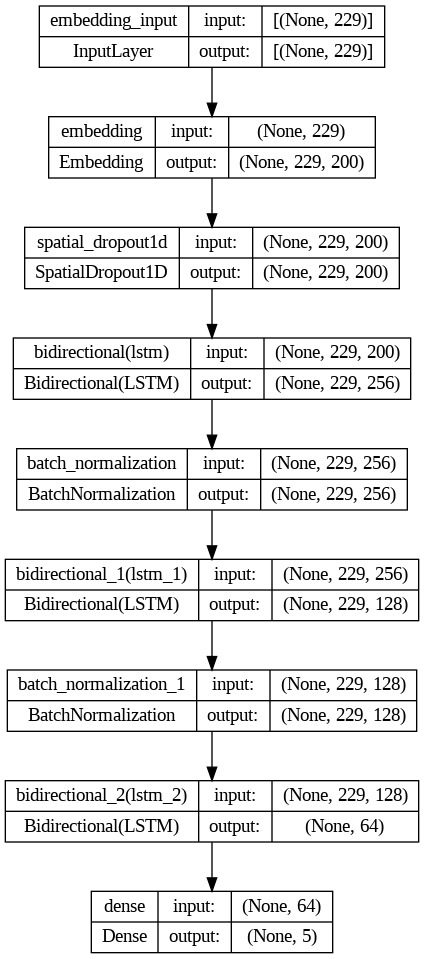

In [67]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

class customCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98:
            print("\nAkurasi pada data pelatihan dan data validasi mencapai nilai > 95%")
            self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=20,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
    customCallback(),
]

Fit model

In [70]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callbacks]
                   )

Epoch 1/30
21/21 [==============================] - 136s 5s/step - loss: 1.5226 - accuracy: 0.3566 - val_loss: 1.5827 - val_accuracy: 0.3470 - lr: 0.0010
Epoch 2/30
21/21 [==============================] - 108s 5s/step - loss: 1.1944 - accuracy: 0.4984 - val_loss: 1.5406 - val_accuracy: 0.4631 - lr: 0.0010
Epoch 3/30
21/21 [==============================] - 107s 5s/step - loss: 0.9665 - accuracy: 0.5710 - val_loss: 1.4729 - val_accuracy: 0.5685 - lr: 0.0010
Epoch 4/30
21/21 [==============================] - 106s 5s/step - loss: 0.8045 - accuracy: 0.6539 - val_loss: 1.4151 - val_accuracy: 0.6699 - lr: 0.0010
Epoch 5/30
21/21 [==============================] - 106s 5s/step - loss: 0.6724 - accuracy: 0.7274 - val_loss: 1.3151 - val_accuracy: 0.7587 - lr: 0.0010
Epoch 6/30
21/21 [==============================] - 110s 5s/step - loss: 0.5515 - accuracy: 0.7847 - val_loss: 1.2542 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 7/30
21/21 [==============================] - 105s 5s/step - loss: 0.4

print the overall loss and accuracy

In [71]:
lstm_accuracy = model.evaluate(X_val, y_val, verbose=1)[1]

166/166 [==============================] - 69s 414ms/step - loss: 0.0638 - accuracy: 0.9834


In [72]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df['Emotion']), y_pred))

166/166 [==============================] - 69s 409ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       675
           1       0.98      0.99      0.98       892
           2       0.98      0.99      0.99      1753
           3       0.99      0.96      0.98       800
           4       0.99      0.98      0.98      1185

    accuracy                           0.98      5305
   macro avg       0.98      0.98      0.98      5305
weighted avg       0.98      0.98      0.98      5305



Visualize Loss & Accuracy

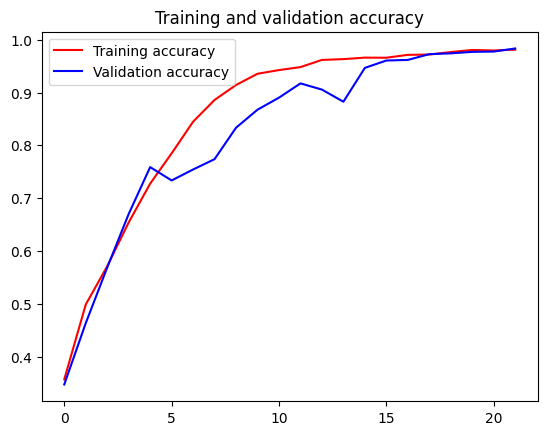

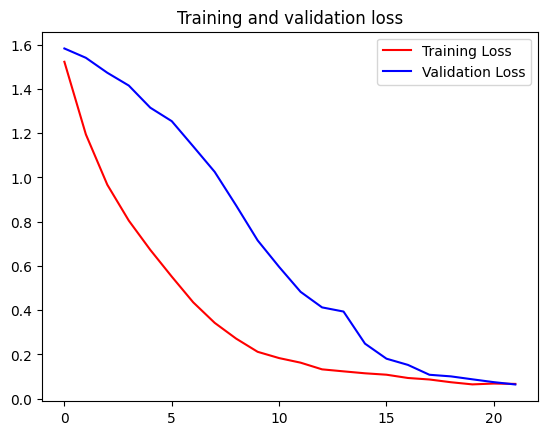

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Results**

In [74]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'LSTM'],
    'Accuracy': [round(log_reg_accuracy, 2), round(SVM_accuracy, 2), round(lstm_accuracy, 2)]
})

models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy
0,LSTM,0.98
1,SVM,0.97
2,Logistic Regression,0.82


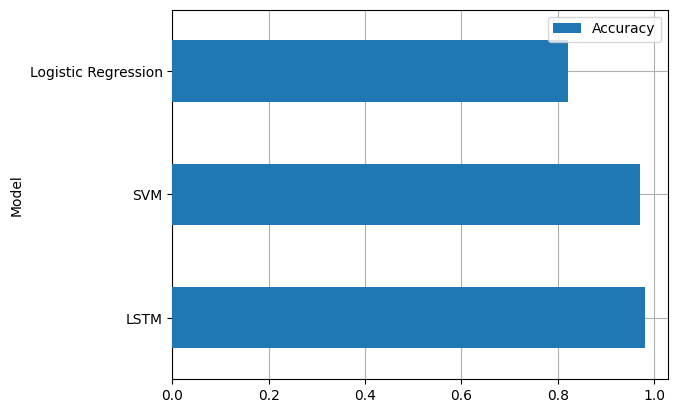

In [75]:
Accuracy = models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
Accuracy.plot(x='Model', y='Accuracy', kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
